In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
table = pd.read_csv("http://www.scipy-lectures.org/_downloads/populations.txt", delimiter = "\t")
arr = table.values

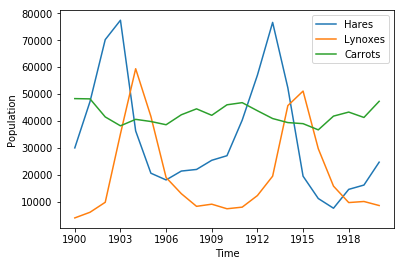

In [2]:
plt.plot(arr[:, 0], arr[:, 1], label = "Hares")
plt.plot(arr[:, 0], arr[:, 2], label = "Lynoxes")
plt.plot(arr[:, 0], arr[:, 3], label = "Carrots")
plt.xticks(np.arange(arr[:,0].min(), arr[:,0].max(),3))
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.show()

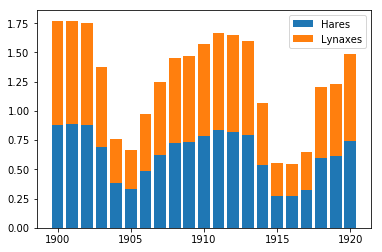

In [3]:
total = arr[:, 1:3].sum(axis = 1)
plt.bar(arr[:,0], arr[:, 1]/total, label = "Hares")
plt.bar(arr[:,0], arr[:, 1]/total, bottom = arr[:,1]/total, label = "Lynaxes")
plt.legend()
plt.show()


D:\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


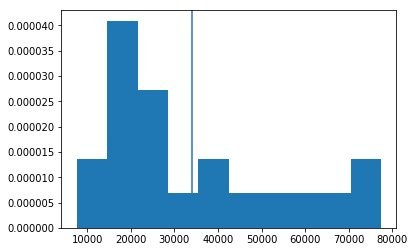

In [5]:
plt.hist(arr[:, 1], bins = 10, normed = True)
plt.axvline(arr[:, 1].mean())
plt.show()


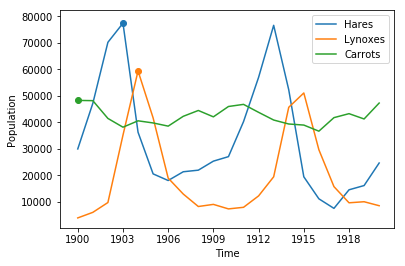

In [6]:
plt.plot(arr[:, 0], arr[:, 1], label = "Hares")
plt.plot(arr[:, 0], arr[:, 2], label = "Lynoxes")
plt.plot(arr[:, 0], arr[:, 3], label = "Carrots")
plt.xticks(np.arange(arr[:,0].min(), arr[:,0].max(),3))
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.scatter(arr[:,0][np.argmax(arr[:,1])],max(arr[:,1]))
plt.scatter(arr[:,0][np.argmax(arr[:,2])],max(arr[:,2]))
plt.scatter(arr[:,0][np.argmax(arr[:,3])],max(arr[:,3]))
plt.show()

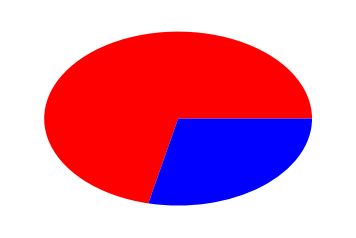

In [7]:
largest = np.where(arr[:, 1] > arr[:, 2], "H", "L")
plt.pie ([largest.tolist().count("H"), largest.tolist().count("L")], colors=["red","blue"])
plt.show()

[70200. 77400. 57000. 76600. 52300.]


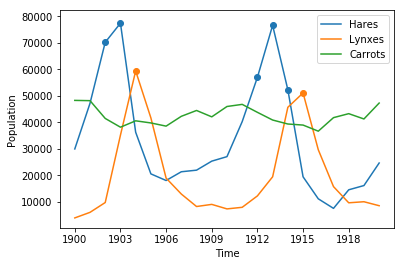

In [8]:
plt.plot(arr[:, 0], arr[:, 1], label = "Hares")
plt.plot(arr[:, 0], arr[:, 2], label = "Lynxes")
plt.plot(arr[:, 0], arr[:, 3], label = "Carrots")
plt.xticks(np.arange(arr[:,0].min(), arr[:,0].max(),3))
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
print(arr[:, 1] [arr[:,1]>50000])
plt.scatter(arr[:,0][arr[:,1]>50000], arr[:, 1][arr[:,1]>50000])
plt.scatter(arr[:,0][arr[:,2]>50000], arr[:, 2][arr[:,2]>50000])
plt.scatter(arr[:,0][arr[:,3]>50000], arr[:, 3][arr[:,3]>50000])
plt.show()

In [9]:
hares = np.sort(arr[:, 1])
lynxes = np.sort(arr[:,2])
carrots = np.sort(arr[:, 3])
print(arr[:,0][arr[:,1] == hares[0]], arr[:,0][arr[:,1] == hares[1]])
print(arr[:,0][arr[:,2] == lynxes[0]], arr[:,0][arr[:,2] == lynxes[1]])
print(arr[:,0][arr[:,3] == carrots[0]], arr[:,0][arr[:,3] == carrots[1]])


[1917.] [1916.]
[1900.] [1901.]
[1916.] [1903.]


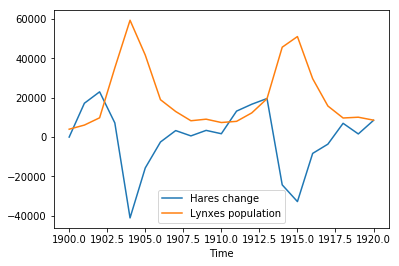

Corr = 0.07189206073535542


In [10]:
newhares = [0] + [arr[:,1][i]-arr[:,1][i-1] for i in range(1 ,len(arr[:, 1]))]
plt.plot(arr[:,0], newhares, label = "Hares change")
plt.plot(arr[:, 0], arr[:, 2], label = "Lynxes population")
plt.xlabel("Time")
plt.legend()
plt.show()
eh = np.mean(arr[:,1])
el = np.mean(arr[:,2])
ehs = np.mean(arr[:,1]*arr[:,1])
els = np.mean(arr[:,2]*arr[:,2])
ehl = np.mean(arr[:,1]*arr[:,2])
corr = (ehl - eh*el)/pow((ehs-eh*eh)*(els-el*el),1/2) 
print("Corr =", corr)

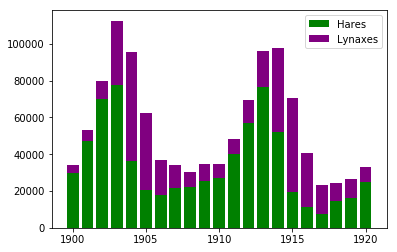

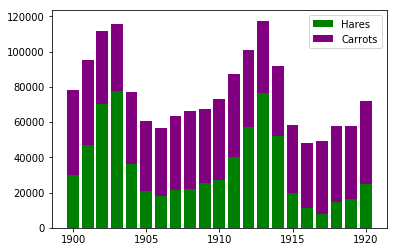

In [11]:

plt.bar(arr[:,0], arr[:, 1], label = "Hares",color = "green")
plt.bar(arr[:,0], arr[:, 2], bottom = arr[:,1], label = "Lynaxes", color = "purple")
plt.legend()
plt.show()

plt.bar(arr[:,0], arr[:, 1], label = "Hares",color = "green")
plt.bar(arr[:,0], arr[:, 3], bottom = arr[:,1], label = "Carrots", color = "purple")
plt.legend()
plt.show()


In [21]:
hl = np.loadtxt("http://www.scipy-lectures.org/_downloads/populations.txt")

def new_num(a):
    return a/(max(a) - min(a))
newhl = np.delete(hl, 20, 0)
for i in range(4):
    newhl[:,i] = new_num(newhl[:,i])
def coeff(hl, b):
    v = np.array([b[0] + b[1] * hl[i][2] for i in range(20)])
    return np.sum(np.array([(v[i]-hl[i][1] )*(v[i]-hl[i][1]) for i in range(20)]))/40
def find_num(hl):
    b = np.array([1,3])
    num = 0
    while True: 
        c = np.array([b[0] + b[1]*hl[i][2] for i in range(20)])
        z = np.sum(np.array([c[i] - hl[i][1] for i in range(20)]))/20
        f = np.array([z,np.sum(np.array([(c[i] - hl[i][1]) * hl[i][2] for i in range(20)]))/20])
        b1 = np.array([b[i] - 0.0001 * f[i] for i in range(2)])
        m = coeff(hl, b1)
        if (abs(m - num) < 0.00001):
            break
        b = b1
        num = m
    return b
b = find_num(newhl)
getnumber = b[0] + b[1] * hl[20][2]
print("Number = ", getnumber)
      




Number =  18975.33946019115
